In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv(r'D:\My_project\ml_project\notebook\meta_stock.csv')

In [3]:
date_column = df['Date']

In [4]:
features_scaling = df[['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']]

In [5]:
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(features_scaling)

In [6]:
scaled_df = pd.DataFrame(scaled_data, columns=['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'])
scaled_df['Date'] = date_column
scaled_df.set_index('Date', inplace=True)

In [7]:
print(scaled_df.head(2))

                Open      High       Low     Close  Adj Close    Volume
Date                                                                   
02-01-2020  0.265642  0.270571  0.274327  0.275688   0.275337  0.029137
03-01-2020  0.266689  0.271954  0.275905  0.273156   0.272808  0.025219


In [8]:
train_size = int(len(scaled_df) * 0.8)
train_data = scaled_df.iloc[:train_size]
test_data = scaled_df.iloc[train_size:]

In [10]:
def create_sequences(data, seq_length):
    X = []
    y = []
    for i in range(seq_length, len(data)):
        X.append(data[i-seq_length:i, :])
        y.append(data[i, 3])
    return np.array(X), np.array(y)
seq_length = 60

In [11]:
X_train, y_train = create_sequences(train_data.values, seq_length)
X_test, y_test = create_sequences(test_data.values, seq_length)

In [13]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], X_train.shape[2]))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], X_test.shape[2]))

In [14]:
model = Sequential()

In [15]:
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.2))

C:\Users\HP\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [16]:
model.add(LSTM(units=50, return_sequences=False))
model.add(Dropout(0.2))

In [17]:
model.add(Dense(units=1))

In [18]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [19]:
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/20
26/26 ━━━━━━━━━━━━━━━━━━━━ 6s 54ms/step - loss: 0.0442 - val_loss: 0.0105
Epoch 2/20
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0051 - val_loss: 0.0047
Epoch 3/20
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0031 - val_loss: 0.0042
Epoch 4/20
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0028 - val_loss: 0.0062
Epoch 5/20
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0027 - val_loss: 0.0032
Epoch 6/20
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0024 - val_loss: 0.0032
Epoch 7/20
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0021 - val_loss: 0.0081
Epoch 8/20
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0021 - val_loss: 0.0044
Epoch 9/20
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0021 - val_loss: 0.0026
Epoch 10/20
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0020 - val_loss: 0.0027
Epoch 11/20
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0021 - val_loss: 0.0032
Epoch 12/20
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0

In [20]:
predicted_stock_price = model.predict(X_test)

5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 118ms/step


In [21]:
predicted_stock_price = scaler.inverse_transform(np.concatenate([np.zeros((len(predicted_stock_price), 5)), predicted_stock_price], axis=1))[:, 5]


In [24]:
real_stock_price = scaler.inverse_transform(np.concatenate([np.zeros((len(real_stock_price), 5)), real_stock_price.reshape(-1, 1)], axis=1))[:, 5]


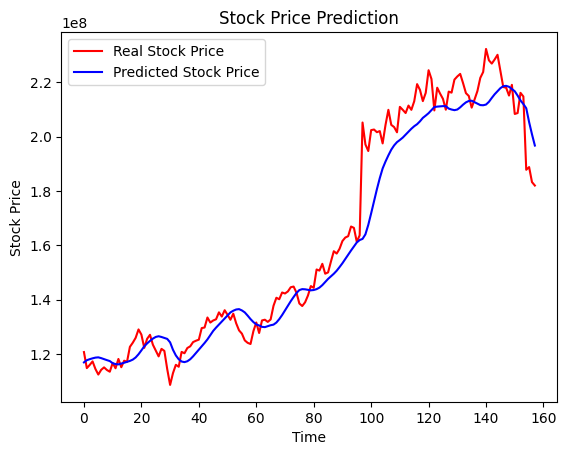

In [25]:
plt.plot(real_stock_price, color='red', label='Real Stock Price')
plt.plot(predicted_stock_price, color='blue', label='Predicted Stock Price')
plt.title('Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

In [26]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,02-01-2020,206.750000,209.789993,206.270004,209.779999,209.557648,12077100
1,03-01-2020,207.210007,210.399994,206.949997,208.669998,208.448837,11188400
2,06-01-2020,206.699997,212.779999,206.520004,212.600006,212.374680,17058900
3,07-01-2020,212.820007,214.580002,211.750000,213.059998,212.834183,14912400
4,08-01-2020,213.000000,216.240005,212.610001,215.220001,214.991898,13475000
